In [1]:
from dsc2024 import datasets
from dsc2024 import images

In [9]:
df = datasets.get_public_dataset(expand_metar_and_metaf=False)

In [10]:
len(df[df.url_img_satelite.isna()])

3733

In [11]:
len(df[df.url_img_satelite.notna()])

298666

In [8]:
len(df.url_img_satelite.unique())

8465

In [9]:
url_espera = df[df.espera == 1].url_img_satelite.iloc[1]
url_sem_espera = df[df.espera == 0].url_img_satelite.iloc[1]

In [10]:
img_espera = images.download_image_and_cropit(url_espera)
img_sem_espera = images.download_image_and_cropit(url_sem_espera)

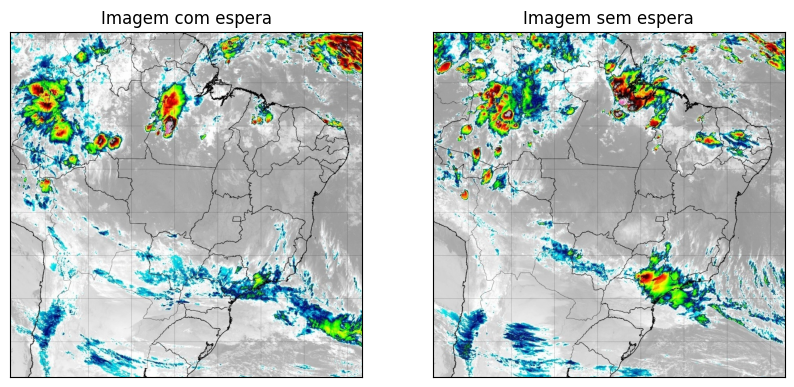

In [11]:
from matplotlib import pyplot as plt
# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image on the first subplot
axes[0].imshow(img_espera)
axes[0].set_title('Imagem com espera')

# Display the second image on the second subplot
axes[1].imshow(img_sem_espera)
axes[1].set_title('Imagem sem espera')

# Hide the axes ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()

In [12]:
from dsc2024 import features

In [25]:
preprocessor, vit = features.load_transformer_feature_extractor()
v_espera = features.feature_extraction_from_image(img_espera, preprocessor, vit)
v_sem_espera = features.feature_extraction_from_image(img_sem_espera, preprocessor, vit)

In [16]:
v_espera.shape

(768,)

In [19]:
v_sem_espera.shape

(768,)

In [24]:
from scipy.spatial.distance import cosine as cosine_distance

# similaridade de cosseno
1 - cosine_distance(v_espera, v_sem_espera)

0.8660211526632843